In [3]:
import pandas as pd 
dados= pd.read_csv("C:/Users/JOHGNATAN/OneDrive/Área de Trabalho/Python_Data_Science/base_de_dados_diversos/aluguel.csv", sep = ';')
dados.head(5)


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Metro m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,34.67,Apartamento
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento


In [4]:
bairros = ['Copacabana','Ipanema','Barra da Tijuca','Leblon','Botafogo','Flamengo','Tijuca']

selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]
dados['Bairro'].drop_duplicates()


0           Copacabana
2      Barra da Tijuca
16            Botafogo
21              Tijuca
25              Leblon
27             Ipanema
110           Flamengo
Name: Bairro, dtype: object

In [5]:
grupo_bairro = dados.groupby('Bairro')

for bairros, info in grupo_bairro:
    print(bairros)

Barra da Tijuca
Botafogo
Copacabana
Flamengo
Ipanema
Leblon
Tijuca


In [8]:
for bairros, info in grupo_bairro:
    print('{} ->{}'.format(bairros,dados['Valor'].mean()))

Barra da Tijuca ->8793.691271551725
Botafogo ->8793.691271551725
Copacabana ->8793.691271551725
Flamengo ->8793.691271551725
Ipanema ->8793.691271551725
Leblon ->8793.691271551725
Tijuca ->8793.691271551725


In [9]:
grupo_bairro['Valor','Condominio'].mean().round(2)

C:\Users\JOHGNA~1\AppData\Local\Temp/ipykernel_4536/324549445.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grupo_bairro['Valor','Condominio'].mean().round(2)


,Valor,Condominio
Bairro,,
Barra da Tijuca,9015.27,3457.14
Botafogo,19446.17,2772.20
Copacabana,4508.42,1140.42
Flamengo,6923.48,1869.24
Ipanema,10456.52,2245.37
Leblon,11052.35,2217.60
Tijuca,2954.67,784.49


# Estastíticas Descritivas

In [10]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,6259.0,9015.27,30185.65,0.0,2000.0,3500.0,8000.0,738197.0
Botafogo,1377.0,19446.17,128902.14,0.0,2500.0,4000.0,11000.0,4500000.0
Copacabana,3186.0,4508.42,6412.90,0.0,1900.0,3000.0,4880.0,198000.0
Flamengo,812.0,6923.48,15767.99,200.0,1900.0,3000.0,5325.0,212544.0
Ipanema,2233.0,10456.52,20859.22,100.0,4000.0,7000.0,12000.0,800000.0
Leblon,1478.0,11052.35,20707.09,100.0,4500.0,7000.0,11900.0,430000.0
Tijuca,1359.0,2954.67,7979.73,320.0,1425.0,1800.0,2499.5,230000.0


In [11]:
grupo_bairro['Valor'].aggregate(['min', 'max','sum'])

,min,max,sum
Bairro,,,
Barra da Tijuca,0.0,738197.0,56426579.0
Botafogo,0.0,4500000.0,26777376.0
Copacabana,0.0,198000.0,14363823.0
Flamengo,200.0,212544.0,5621869.0
Ipanema,100.0,800000.0,23349404.0
Leblon,100.0,430000.0,16335366.0
Tijuca,320.0,230000.0,4015402.0


In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20, 10))

### Teremos um gráfico em barra, em que podemos identificar a variação atípica no bairro "Botafogo". 

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

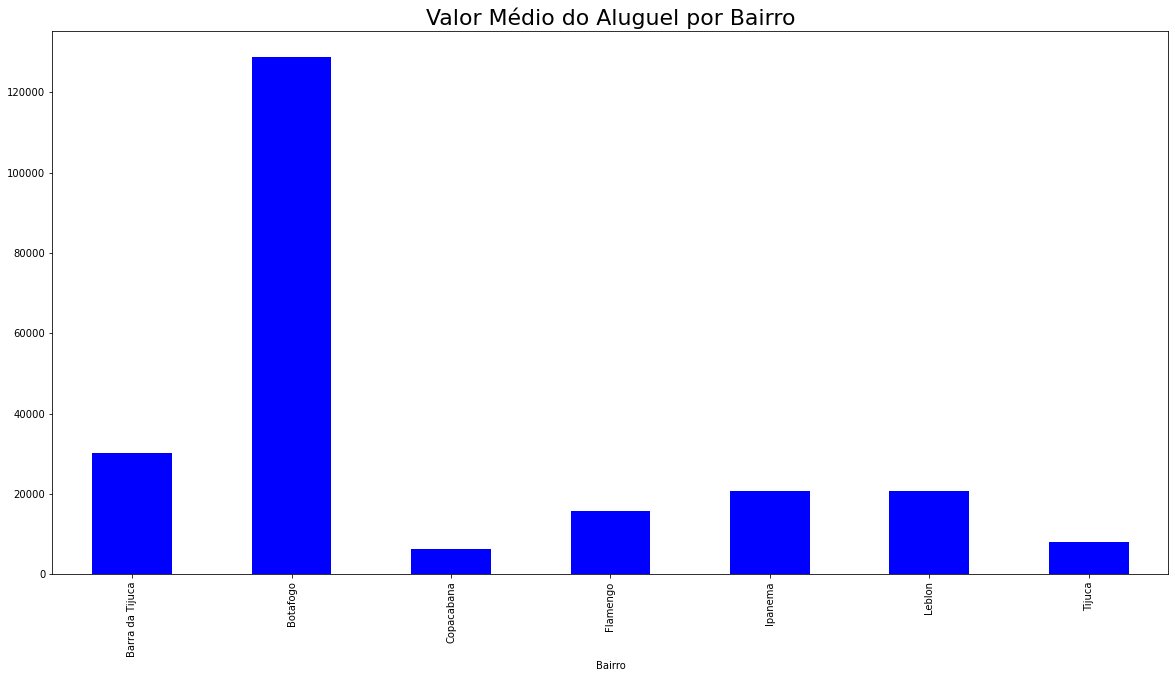

In [13]:
fig = grupo_bairro['Valor'].std().plot.bar(color = 'blue')
fig.set_label('valor do Aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize': 22})

# Frequências de Quartos

In [14]:
classes = [0, 2, 4, 6, 100]

In [15]:

quartos = pd.cut(dados['Quartos'],classes)



In [16]:
pd.value_counts(quartos)

(2, 4]      6346
(0, 2]      6049
(4, 6]       472
(6, 100]      44
Name: Quartos, dtype: int64

In [17]:
labels = ['0 e 2 quartos',
          '3 e 4 quartos',
          '5 e 6 quartos',
          '7 quartos ou mais']

In [18]:
quartos = pd.cut(dados['Quartos'], classes, labels = labels)
freq_quartos = pd.value_counts(quartos)

In [19]:
tabela = pd.DataFrame(freq_quartos)


In [20]:
tabela.sort_values(by = 'Quartos', ascending = False)
tabela.columns.name = 'Faixa de Quartos'
tabela.sort_index(inplace=True)
tabela

Faixa de Quartos,Quartos
0 e 2 quartos,6049
3 e 4 quartos,6346
5 e 6 quartos,472
7 quartos ou mais,44
